The function `get_cell_counts` allows you to convert the Polaris output to a gene counts per cell table. This format is compatible with many downstream analysis tools, such as scanpy and squidpy. The data in this form can also be exported for downstream analysis in R packages, like Seurat and SpatialExperiment.

To run this notebook you will need to pip install scanpy, which is not included in the requirements file for this package.

In [1]:
#pip install scanpy

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from anndata import AnnData
import scanpy as sc

from tensorflow.keras.utils import get_file

from deepcell.datasets import Dataset
from deepcell_spots.utils.results_utils import get_cell_counts

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [3]:
def load_data(self, path=None):
    path = path if path else self.path
    
    basepath = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    prefix = path.split(os.path.sep)[:-1]
    data_dir = os.path.join(basepath, *prefix) if prefix else basepath
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    elif not os.path.isdir(data_dir):
        raise IOError('{} exists but is not a directory'.format(data_dir))

    path = get_file(path,
                    origin=self.url,
                    file_hash=self.file_hash)
    df = pd.read_csv(path, index_col=0)

    return df

In [4]:
Dataset.load_data = load_data

In [5]:
data = Dataset(
    path='example_output.csv',
    url='https://deepcell-data.s3.us-west-1.amazonaws.com/spot_detection/multiplex/Moffitt/example_output.csv',
    file_hash='3a9c5c9a70c15b9a04c780724f35ed23',
    metadata={})

df_spots = data.load_data()
df_spots

,x,y,batch_id,cell_id,spot_index,predicted_id,predicted_name,probability,source,Int-Round-0,...,Int-Round-10,Int-Round-11,Int-Round-12,Int-Round-13,Int-Round-14,Int-Round-15,Int-Round-16,Int-Round-17,Int-Round-18,Int-Round-19
0,1932,839,26,184,0,223,Cckar,0.998056,prediction,0.000498,...,0.000094,0.002654,0.000718,0.000551,0.000554,0.342880,0.009878,0.003467,0.978873,0.005818
1,1742,1294,26,0,1,46,Net1,0.997407,prediction,0.991178,...,0.016775,0.005587,0.011815,0.002800,0.139285,0.000123,0.026418,0.000985,0.000614,0.892528
2,426,493,26,16,2,92,Sdc1,0.980227,prediction,0.493634,...,0.036248,0.537814,0.579628,0.933970,0.000150,0.003693,0.750963,0.894225,0.952230,0.680540
3,1624,1429,26,132,3,267,Unknown,0.376677,prediction,0.001390,...,0.044941,0.032382,0.025396,0.027756,0.068567,0.000482,0.008220,0.000448,0.127643,0.008051
4,803,1103,26,37,4,2,Maoa,0.603465,prediction,0.011030,...,0.015268,0.011515,0.445703,0.019353,0.000910,0.118593,0.018834,0.021816,0.003159,0.142479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,888,270,26,67,18451,266,Background,-1.000000,mixed rescue,0.000677,...,0.000604,0.644011,0.003838,0.238130,0.000740,0.001062,0.003672,0.000031,0.000160,0.007264
19826,642,6,26,0,18493,57,Ccl9,-1.000000,mixed rescue,0.007562,...,0.113754,0.950529,0.457988,0.275983,0.292056,0.552076,0.241926,0.252654,0.594836,0.534249
19827,1141,1126,26,103,18579,266,Background,-1.000000,mixed rescue,0.034168,...,0.016500,0.068586,0.013576,0.020327,0.008910,0.001567,0.010300,0.009702,0.000085,0.012457
19828,992,1498,26,73,18644,266,Background,-1.000000,mixed rescue,0.950066,...,0.016749,0.019959,0.028764,0.013914,0.004415,0.724745,0.011553,0.009385,0.013443,0.014157


In [6]:
cell_counts = get_cell_counts(df_spots)
cell_counts

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]


,batch_id,cell_id,Cckar,Net1,Sdc1,Maoa,Cd4,Neat1,Glp2r,Cd79b,...,Ptger2,Taar8c,Taar3,Rcor2,Htr5a,Taar8b,Drd3,Scn3a,Gper1,Gpr18
0,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,5,3,2,10,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,26,192,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,26,193,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,26,194,1,0,1,0,9,4,2,0,...,0,0,0,0,0,0,0,0,0,0
194,26,195,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
zero_cells = []
for i in range(len(cell_counts)):
    if sum(cell_counts.iloc[i].values[2:])==0:
        zero_cells.append(i)
mask = cell_counts.index.isin(zero_cells)
cell_counts = cell_counts.loc[~mask]
cell_counts

,batch_id,cell_id,Cckar,Net1,Sdc1,Maoa,Cd4,Neat1,Glp2r,Cd79b,...,Ptger2,Taar8c,Taar3,Rcor2,Htr5a,Taar8b,Drd3,Scn3a,Gper1,Gpr18
1,26,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,5,3,2,10,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0
5,26,6,0,3,8,5,0,23,0,1,...,0,0,0,0,0,0,0,0,0,0
6,26,7,2,0,7,2,1,11,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,26,191,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
192,26,193,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,26,194,1,0,1,0,9,4,2,0,...,0,0,0,0,0,0,0,0,0,0
194,26,195,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
features = cell_counts.to_numpy()[:,2:]
features.shape

(190, 196)

In [9]:
adata = AnnData(features)

Example clustering analysis for cell type assignment is shown below.

In [10]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

AnnData object with n_obs × n_vars = 190 × 196
    obs: 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

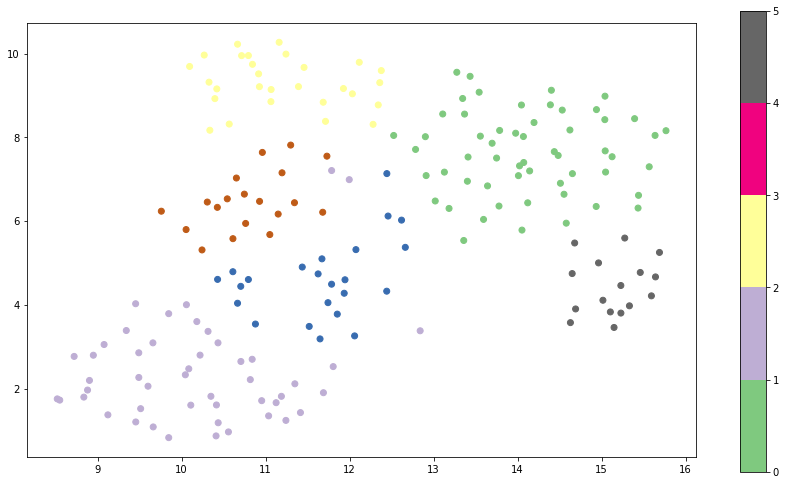

In [11]:
cm = mpl.cm.get_cmap('Accent')
cell_assignments = np.array(adata.obs['leiden'].astype(int))
n_cell_types = max(cell_assignments)

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1],
                c=np.array(cell_assignments),
                cmap=cm, alpha=1,
                vmax=n_cell_types
               )

bounds = np.linspace(0, n_cell_types, n_cell_types+1)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cm, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.show()